## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

## Task: 1 Logistic Regression

### 1. Finding the Correlation between the features

In [5]:
# check the correlation between the features
corr = data[['x', 'y', 'z', 'x*x', '2*y', '2*z+3*x*x', 'w']].corr()
corr

,x,y,z,x*x,2*y,2*z+3*x*x,w
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000


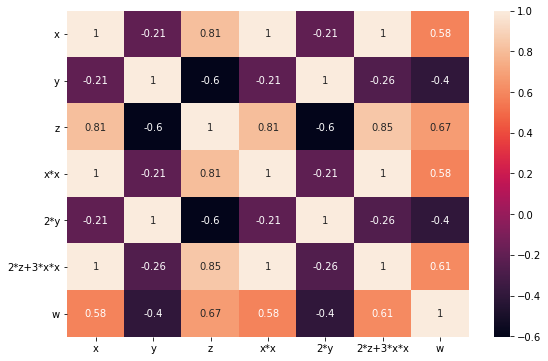

In [6]:
# plot heat map of correlation matrix using seaborn heatmap
plt.figure(figsize=(9,6))
sns.heatmap(corr, annot=True )

### 2. Finding the best model for the given data

In [7]:
# Find the best hyper prameter alpha
Log_Regression = SGDClassifier(loss = 'log', random_state=42)
parameters = {'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000, 100000]}

Grid_Search = GridSearchCV(Log_Regression, parameters, cv=5)
Grid_Search.fit(X, Y)
Grid_Search.best_params_

{'alpha': 0.001}

In [8]:
# Logistic regression with the best alpha
best_model = SGDClassifier(loss = 'log', alpha= 0.001)
best_model.fit(X, Y)
best_model

SGDClassifier(alpha=0.001, loss='log')

### 3. Getting the weights with the original data

In [9]:
# Check the accuracy of the model 'best_model_accuracy'
from sklearn.metrics import accuracy_score

Y_pred = best_model.predict(X)

best_model_accuracy = accuracy_score(Y, Y_pred)
print(best_model_accuracy)

1.0


In [10]:
# Get the weights W
W = best_model.coef_
W

array([[ 1.25484893, -1.52540407,  3.51711324,  1.07054671, -1.52540407,
         1.38813066,  0.94597767]])

### 4. Modifying original data

In [11]:
# Add a noise(order of 10^-2) to each element of X 
X_ = [i + 0.01 for i in X]

In [12]:
best_model_edited = SGDClassifier(loss = 'log', alpha= 0.001)
best_model_edited.fit(X_, Y)
best_model_edited

SGDClassifier(alpha=0.001, loss='log')

In [13]:
pred_Y = best_model_edited.predict(X_)

best_model_accuracy_edited = accuracy_score(Y, pred_Y)
best_model_accuracy_edited

1.0

In [14]:
W_edited = best_model_edited.coef_
W_edited

array([[ 1.22942033, -2.39513711,  4.3132636 ,  1.04791103, -2.39513711,
         1.463815  ,  0.30669884]])

### 5.  Checking deviations in metric and weights

In [15]:
# find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy
diff = best_model_accuracy_edited - best_model_accuracy
diff

0.0

In [16]:
# find the absolute change between each value of W and W'
W_change = abs(W - W_edited)
W_change 

array([[0.02542861, 0.86973304, 0.79615036, 0.02263568, 0.86973304,
        0.07568434, 0.63927884]])

In [17]:
col = data.columns.values
for i in np.argsort(W_change[0])[::-1][0:4]:
    print(col[i])

2*y
y
z
w


### Observations:

In Logistic Regression

- We performed pertubation test for checking the presence of Collinearity.
- Looking at the W_change(difference between the original and pertubation data), the W_change does not differ significantly which indicates low collinearity

***
***
***
***
***
***

## Task: 2 Linear SVM

### Finding the best model for the given data

In [18]:
# Find the best hyper prameter alpha
SVM = SGDClassifier(loss = 'hinge', random_state=42)
params = {'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000, 100000]}

grid_search = GridSearchCV(SVM, params, cv=5)
grid_search.fit(X, Y)
grid_search.best_params_

{'alpha': 1e-05}

In [19]:
# Linear SVM with the best alpha
best_model_svm = SGDClassifier(loss = 'hinge', alpha= 0.00001)
best_model_svm.fit(X, Y)
best_model_svm

SGDClassifier(alpha=1e-05)

### Getting the weights with the original data

In [20]:
# Check the accuracy of the model 
from sklearn.metrics import accuracy_score

y_pred = best_model_svm.predict(X)

svm_best_model_accuracy = accuracy_score(Y, y_pred)
print(svm_best_model_accuracy)

1.0


In [21]:
_W = best_model_svm.coef_
_W

array([[ 7.43172889, -9.96143911, 30.70610978,  6.95095714, -9.96143911,
         9.96314103,  2.71743019]])

### Modifying original data

In [22]:
svm_best_model_edited = SGDClassifier(loss = 'hinge', alpha= 0.00001)
svm_best_model_edited.fit(X_, Y)
svm_best_model_edited

SGDClassifier(alpha=1e-05)

In [23]:
pred_y = svm_best_model_edited.predict(X_)

svm_best_model_accuracy_edited = accuracy_score(Y, pred_y)
svm_best_model_accuracy_edited

1.0

In [24]:
svm_W_edited = svm_best_model_edited.coef_
svm_W_edited

array([[ 34.4676377 , -38.43844209,  72.85323836,  28.88101411,
        -38.43844209,  34.78572954,  12.50878587]])

### Checking deviations in metric and weights

In [25]:
# find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy
svm_diff = svm_best_model_accuracy_edited - svm_best_model_accuracy
svm_diff

0.0

In [26]:
# find the absolute change between each value of W and W'
W_change_svm = abs(_W - svm_W_edited)
W_change_svm

array([[27.03590881, 28.47700298, 42.14712858, 21.93005697, 28.47700298,
        24.82258851,  9.79135568]])

In [27]:
col = data.columns.values
for i in np.argsort(W_change_svm[0])[::-1][0:4]:
    print(col[i])

z
2*y
y
x


### Observations:

- From the above results, we can see that the W_change differs significantly so the features are collinear

- Now, from the above results, we conclude that Logistic Regression performs better than Linear SVM on pertubation test 